In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [2]:
zom = pd.read_csv(r'C:\Users\SCHOOL\Desktop\udacity\zomato_geospatial/zomato.csv')

In [3]:
zom.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zom.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
# Total 51717 observations and 17 variables are present in the dataset
zom.shape 

(51717, 17)

In [6]:
zom.isnull().sum() # sum of missing values in each column of the dataset.

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
# Taking out the features which has missing values in the dataset.

feature_na = [feature for feature in zom.columns if zom[feature].isnull().sum() > 0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
# Finding the percentage of missing values for each feature 

for feature in feature_na:
    print("{feat} has {percentage_missing}% of missing values in the dataset.".
          format(feat = feature, percentage_missing = np.round((zom[feature].isnull().sum()/len(zom)*100), 4)))

rate has 15.0337% of missing values in the dataset.
phone has 2.3358% of missing values in the dataset.
location has 0.0406% of missing values in the dataset.
rest_type has 0.4389% of missing values in the dataset.
dish_liked has 54.2916% of missing values in the dataset.
cuisines has 0.087% of missing values in the dataset.
approx_cost(for two people) has 0.669% of missing values in the dataset.


#### Cleaning rate feature

In [9]:
# Unique values in the rate feature of the dateset
zom['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

I will keep just the 1st part of the rating and remove any unwanted characters from the data for rating.
As rating is an important feature about a particulat restraunt, so customers who did not rate will be removed from the analysis. There are  15.0337% of customers who didnt rate the particular restraunt.

In [10]:
# Dropping observations with missing values in the rate column of the data

zom.dropna(axis = 'index', subset =['rate'], inplace = True) # subset is to indicate for which column to look for na values

In [11]:
zom.shape

(43942, 17)

In [12]:
zom['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
zom['rate'] = zom['rate'].apply(lambda x : x.replace('/5', '')) #using lambda function to update each rating 

In [14]:
zom['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [15]:
sum(((zom['rate'] == 'NEW') == True))

2208

In [16]:
sum((zom['rate'] == '-') == True)

69

In [17]:
# replacing New restraunts and restraunts not yet rated as 0.
zom['rate'] = zom['rate'].replace(['NEW', '-'], 0)

In [18]:
zom['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [19]:
zom['rate'] = zom['rate']. astype(float)

In [20]:
zom['phone']

0          080 42297555\r\n+91 9743772233
1                            080 41714161
2                          +91 9663487993
3                          +91 9620009302
4        +91 8026612447\r\n+91 9901210005
                       ...               
51709      +91 9980121279\n+91 9900240646
51711                        080 65951222
51712                        080 40301477
51715                        080 49652769
51716                      +91 8071117272
Name: phone, Length: 43942, dtype: object

#### Cleaning phone Column

In [21]:
zom['phone'] = [[re.sub('[\d][\r\n]+[+\d]', ', +', str(x))] for x in zom['phone']]

In [22]:
zom.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"[080 4229755, +91 9743772233]",Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,[080 41714161],Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,[+91 9663487993],Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,[+91 9620009302],Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,"[+91 802661244, +91 9901210005]",Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Calculating Average Rating of each Restraunts listed on the online food delivery app Zomato

In [23]:
#Grouping the dataframe by name of restraunts and then applying mean() function to calculate the mean of each.

rest_rate = zom.groupby('name')['rate'].mean().to_frame().reset_index()
rest_rate.columns = ['restraunt', 'avg_rating']
rest_rate.head()

,restraunt,avg_rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7


#### Top rated restraunts in Bengaluru

In [24]:
# Sorting restraunts based on their ratings
top_rated_restraunts = rest_rate.sort_values(by='avg_rating',ascending = False)
top_rated_restraunts.head(10)

,restraunt,avg_rating
469,Asia Kitchen By Mainland China,4.900000
5345,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
1037,Byg Brewski Brewing Company,4.900000
4858,Punjab Grill,4.871429
690,Belgian Waffle Factory,4.844828
6544,The Pizza Bakery,4.800000
4473,O.G. Variar & Sons,4.800000
2163,Flechazo,4.800000
100,AB's - Absolute Barbecues,4.789474
636,Barbecue by Punjab Grill,4.750000


C:\Users\SCHOOL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SCHOOL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SCHOOL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SCHOOL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


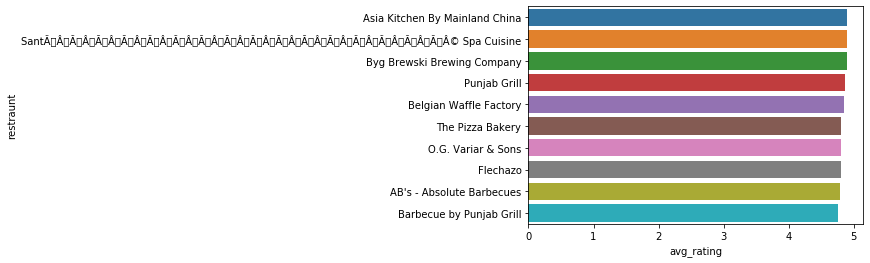

In [25]:
sns.barplot(x = 'avg_rating' , y ='restraunt', data = top_rated_restraunts[0:10] )

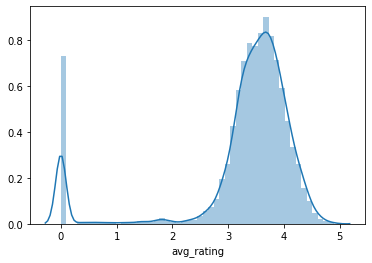

In [26]:
sns.distplot(rest_rate['avg_rating'])

From the above plot:
> I can see that there is a group of restraunts which has rating zero, this means tha they are newly listed restraunts on the app and have not received any ratings from the customers yet.
> Also, it can be observed from the distribution that most of the restraunts(around 50%) have ratings between 3 to 4.2 approximately.

#### Function to retrive restraunt index from the dataframe based on its rating on app

* Input : Function take dataframe and the ratings for which restraunts needs to be filtered.
    * df : Dataframe object
    * value : Value of interest
* returns : A tuple with index of the restrunt in the dataframe and column name

In [27]:
def get_index(df, value):
    
    list_pos = list() # list to store index position along with their values in the dataframe object.
    
    # getting dataframe with true at positions where the values of interest exist in the dataframe.
    results = df.isin([value])
    
    # Extracting columns name's from the dataframe which contains the values of interest.
    names = results.any() # Returns a series object where the any one column contains true value for any particular observations/rows in results dataframe.
    column_names = names[names == True].index
    
    # Now we have to iterate over the columns in which value of interest is present and retrive its index position
    for col in column_names:
        
        '''
        results[col][results[col] returns a df with true at position 
        where true was already present i.e place where required value is present.
        results[col][results[col].index will extract the index
        '''
        rows = results[col][results[col] == True].index 
        for row in rows:
            list_pos.append((col, row)) # storing column name and index in a tuple
            
    return list_pos
    
#get_index(rest_rate, rest_rate['avg_rating'].max())

In [28]:
# rest_rate.iloc[get_index(rest_rate, rest_rate['avg_rating'].max())[0][1]][0]
print("Best Average rating of {rate} was given to {rest} by customers on Zomato".
      format(rate = rest_rate['avg_rating'].max(), rest =  rest_rate.iloc[get_index(rest_rate, rest_rate['avg_rating'].max())[0][1]][0]))

Best Average rating of 4.900000000000001 was given to Asia Kitchen By Mainland China by customers on Zomato


> Asia Kitchen By Mainland China was best rated restraunt on zomato

#### 20 restraunts chains having most number of outlets in Bengaluru.

In [29]:
# Series of 20 restraunts chains having most number of outlets in Bengaluru.
restraunt_chains = zom['name'].value_counts()[0:20] 
restraunt_chains

Cafe Coffee Day      89
Onesta               85
Empire Restaurant    71
Kanti Sweets         68
Just Bake            68
Five Star Chicken    68
Petoo                64
Baskin Robbins       63
Pizza Hut            62
Polar Bear           61
Domino's Pizza       60
KFC                  60
Sweet Truth          60
Beijing Bites        60
Subway               59
Smoor                59
McDonald's           59
Faasos               57
Burger King          55
Keventers            54
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

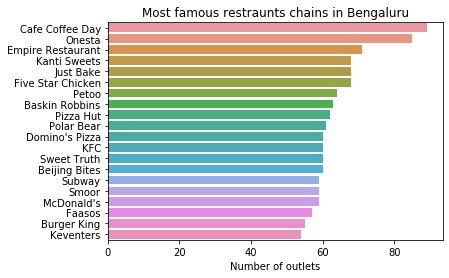

In [30]:
sns.barplot(x = restraunt_chains, y = restraunt_chains.index)
plt.title('Most famous restraunts chains in Bengaluru')
plt.xlabel('Number of outlets')

In [31]:
zom.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"[080 4229755, +91 9743772233]",Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,[080 41714161],Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,[+91 9663487993],Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,[+91 9620009302],Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,"[+91 802661244, +91 9901210005]",Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Online order 

In [32]:
online_order_stats = zom['online_order'].value_counts()
online_order_stats

Yes    28308
No     15634
Name: online_order, dtype: int64

In [48]:
px.pie(zom, values = online_order_stats, labels = ['Online Accepting', 'Not Accepting'],title = 'Online Order distribution')

> From the data above we can see that 28308 restraunts accepts online orders where as 15634 do not.

#### Ratio of restraunts that provide table by those who doesn't provide table

In [37]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [39]:
table_book_stats = zom['book_table'].value_counts()
table_book_stats

No     37509
Yes     6433
Name: book_table, dtype: int64

In [44]:
trace = go.Pie(values = table_book_stats, labels = ['Booking Not Allowed ', 'Booking Allowed'], hoverinfo = 'label+percent', textinfo = 'value')
iplot([trace])